In [4]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

FOCUS_GENES = ('SCN1A','SCN2A','KCNQ2', 'KCNQ3', 'CDKL5',
               'PCDH19', 'SCN1B', 'SCN8A', 'SLC2A1',
               'SPTAN1', 'STXBP1', 'TSC1')

def mk_class(row):
    if row['Classification'] in ('Benign', 'BENIGN', 'LIKELY BENIGN'):
        return 'B'
    elif row['Classification'] in ('LIKLEY PATHOGENIC', 'PATHOGENIC', 'LIKELY PATHOGENIC', 'Reduced function allele'):
        return 'P'
    elif row['Classification'] in ('VUS', 'VOUS'):
        return 'V'
    else:
        print(row['Classification'])
        i = 1/0
        
afile = '../data/raw/EPIv6.xlsx'
df = pd.read_excel(afile)
df.loc[:, 'class'] = df.apply(mk_class, axis=1)
focus = df[ df.apply(lambda row: str(row['Gene Symbol']) in FOCUS_GENES and row['class'] != 'V', axis=1) ]
ss = focus.groupby(['Gene Symbol', 'class']).size().reset_index().rename(columns={0:'size'})

In [5]:
ss.head()

,Gene Symbol,class,size
0,CDKL5,B,6
1,CDKL5,P,36
2,KCNQ2,B,12
3,KCNQ2,P,64
4,KCNQ3,B,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

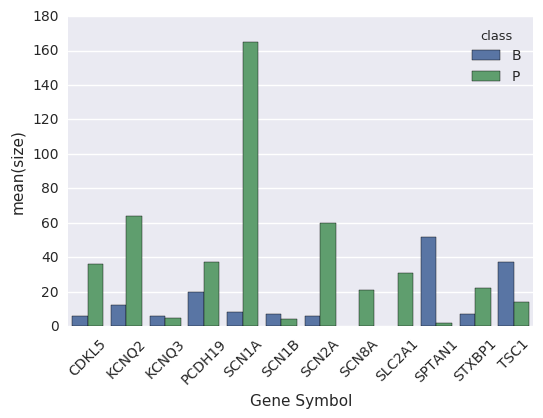

In [6]:
sns.barplot(x='Gene Symbol', y='size', hue='class', data=ss)
plt.xticks(rotation=45)